In [49]:
import csv
import argparse
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_recall_fscore_support, roc_auc_score
from sklearn import metrics, preprocessing

import numpy as np


def report(le, y_test, y_pred):
        print("Classifation Report")
#         print(len(y_test))
#         print(len(y_pred))
#         print(type(y_test))
#         print(type(y_pred))
        print(y_test)
        print(y_pred)
#
#         print(le.classes_)
#         print(le.transform(le.classes_))

        target_names = le.classes_
        class_indices = {cls: idx for idx, cls in enumerate(le.classes_)}
        print(class_indices)

        print(metrics.classification_report(y_test, y_pred, target_names=target_names,
                                            labels=["" + str(class_indices[cls]) for cls in target_names]))

        print("============================================================")
        print("Confusion matrix")
        print("============================================================")
        print(target_names)
        print(confusion_matrix(y_test, y_pred,
            labels=[class_indices[cls] for cls in target_names]))

        precision_micro, recall_micro, fscore_micro, _ = \
        precision_recall_fscore_support(y_test, y_pred, average='micro', pos_label=None)

        precisions_macro, recalls_macro, fscore_macro, _ = \
        precision_recall_fscore_support(y_test, y_pred, average='macro', pos_label=None)

        precisions_weighted, recalls_weighted, fscore_weighted, _ =\
        precision_recall_fscore_support(y_test, y_pred, average='weighted', pos_label=None)

        measures = "p: %.4f r: %.4f f1: %.4f"
        print("Micro:  " + measures % (precision_micro, recall_micro, fscore_micro))
        print("Macro:  " + measures % (precisions_macro, recalls_macro, fscore_macro))
        print("Weight: " + measures % (precisions_weighted, recalls_weighted, fscore_weighted))

        print('Test Accuracy: %.4f' % accuracy_score(y_test, y_pred))
        #print('ROC AUC: %.3f' % roc_auc_score(y_true=y_test, y_score=y_pred))
        print("============================================================")


In [50]:
import os
import re
from keras.preprocessing.text import Tokenizer
def get_texts_from_catdir(cat_dir):
    texts = []
    TRAIN_DIR = cat_dir#"./c50/train"
    category_index = {}
    categories = []
    for category_name in sorted(os.listdir(TRAIN_DIR)):
        category_id = len(category_index)
        category_index[category_name] = category_id
        #print(category_name)
        category_path = os.path.join(TRAIN_DIR, category_name)
        for f_name in sorted(os.listdir(category_path)):
            f_path = os.path.join(category_path, f_name)
            #print(f_name)
            #print(f_path)
            f = open(f_path, "r")
            texts += [f.read()]                
            f.close()
            categories += [category_id]
    print("%d files loaded from %s" % (len(texts), cat_dir))
    return texts, categories, category_index

def get_texts_from_dir(cat_dir, truth_file_path):
    texts = []
    f_names = []
    DIR = cat_dir#"./c50/train"
    f_truth = open(truth_file_path)
    dict_truth = {}
    for line in f_truth:
        line = line.strip().split()
        dict_truth[re.match(".*(subject[0-9]+).*", line[0]).group(1)] = line[1]
    f_truth.close()
    
    categories = []
    for f_name in sorted(os.listdir(DIR)):
        f_path = os.path.join(DIR, f_name)
        #print(f_name)
        #print(f_path)
        f = open(f_path, "r")
        texts += [f.read()]
        f_names += [f_name]
        categories += [int(dict_truth[re.match(".*(subject[0-9]+).*", f_name).group(1)])]
        f.close()
    print("%d files loaded from %s" % (len(texts), cat_dir))
    return texts, categories


In [51]:
# Load the RAW text and Category labels
tr1_p_txt, tr1_p_y = get_texts_from_dir("./nltk_data/corpora/eRisk_keras/train/chunk_1", "./base_paths/train_golden_truth.txt")
tr2_p_txt, tr2_p_y = get_texts_from_dir("./nltk_data/corpora/eRisk_keras/train/chunk1-2", "./base_paths/train_golden_truth.txt")
tr3_p_txt, tr3_p_y = get_texts_from_dir("./nltk_data/corpora/eRisk_keras/train/chunk1-2-3", "./base_paths/train_golden_truth.txt")
tr4_p_txt, tr4_p_y = get_texts_from_dir("./nltk_data/corpora/eRisk_keras/train/chunk1-2-3-4", "./base_paths/train_golden_truth.txt")
tr10_p_txt, tr10_p_y = get_texts_from_dir("./nltk_data/corpora/eRisk_keras/train/chunk1-2-3-4-5-6-7-8-9-10", "./base_paths/train_golden_truth.txt")
tr10_n_txt, tr10_n_y = get_texts_from_dir("./nltk_data/corpora/eRisk_keras/train/chunk1-2-3-4-5-6-7-8-9-10-negative", "./base_paths/train_golden_truth.txt")
te1_txt, te1_y = get_texts_from_dir("./nltk_data/corpora/eRisk_keras/test/chunk_1", "./base_paths/test_golden_truth.txt")
te2_txt, te2_y = get_texts_from_dir("./nltk_data/corpora/eRisk_keras/test/chunk1-2", "./base_paths/test_golden_truth.txt")
te3_txt, te3_y = get_texts_from_dir("./nltk_data/corpora/eRisk_keras/test/chunk1-2-3", "./base_paths/test_golden_truth.txt")
te4_txt, te4_y = get_texts_from_dir("./nltk_data/corpora/eRisk_keras/test/chunk1-2-3-4", "./base_paths/test_golden_truth.txt")
te5_txt, te5_y = get_texts_from_dir("./nltk_data/corpora/eRisk_keras/test/chunk1-2-3-4-5", "./base_paths/test_golden_truth.txt")
te6_txt, te6_y = get_texts_from_dir("./nltk_data/corpora/eRisk_keras/test/chunk1-2-3-4-5-6", "./base_paths/test_golden_truth.txt")
te7_txt, te7_y = get_texts_from_dir("./nltk_data/corpora/eRisk_keras/test/chunk1-2-3-4-5-6-7", "./base_paths/test_golden_truth.txt")
te8_txt, te8_y = get_texts_from_dir("./nltk_data/corpora/eRisk_keras/test/chunk1-2-3-4-5-6-7-8", "./base_paths/test_golden_truth.txt")
te9_txt, te9_y = get_texts_from_dir("./nltk_data/corpora/eRisk_keras/test/chunk1-2-3-4-5-6-7-8-9", "./base_paths/test_golden_truth.txt")
te10_txt, te10_y = get_texts_from_dir("./nltk_data/corpora/eRisk_keras/test/chunk1-2-3-4-5-6-7-8-9-10", "./base_paths/test_golden_truth.txt")
#te_txt, te_y, te_y_ind = get_texts_from_catdir("./nltk_data/corpora/eRisk_keras/test")
#print(tr_y)
#print(tr_y_ind)

#tr_txt = tr1_p_txt + tr2_p_txt + tr3_p_txt + tr4_p_txt + tr10_p_txt + tr10_n_txt
tr_txt = tr10_p_txt + tr10_n_txt
te_txt = te10_txt
#tr_y = tr1_p_y + tr2_p_y + tr3_p_y + tr4_p_y + tr10_p_y + tr10_n_y
tr_y = tr10_p_y + tr10_n_y
te_y = te10_y

83 files loaded from ./nltk_data/corpora/eRisk_keras/train/chunk_1
83 files loaded from ./nltk_data/corpora/eRisk_keras/train/chunk1-2
83 files loaded from ./nltk_data/corpora/eRisk_keras/train/chunk1-2-3
83 files loaded from ./nltk_data/corpora/eRisk_keras/train/chunk1-2-3-4
83 files loaded from ./nltk_data/corpora/eRisk_keras/train/chunk1-2-3-4-5-6-7-8-9-10
403 files loaded from ./nltk_data/corpora/eRisk_keras/train/chunk1-2-3-4-5-6-7-8-9-10-negative
401 files loaded from ./nltk_data/corpora/eRisk_keras/test/chunk_1
401 files loaded from ./nltk_data/corpora/eRisk_keras/test/chunk1-2
401 files loaded from ./nltk_data/corpora/eRisk_keras/test/chunk1-2-3
401 files loaded from ./nltk_data/corpora/eRisk_keras/test/chunk1-2-3-4
401 files loaded from ./nltk_data/corpora/eRisk_keras/test/chunk1-2-3-4-5
401 files loaded from ./nltk_data/corpora/eRisk_keras/test/chunk1-2-3-4-5-6
401 files loaded from ./nltk_data/corpora/eRisk_keras/test/chunk1-2-3-4-5-6-7
401 files loaded from ./nltk_data/corp

In [52]:
# Build Tokenizer and Vocabulary
tokenizer = Tokenizer(num_words=20000)
tokenizer.fit_on_texts(tr_txt)
# Dictionary of the WHOLE extracted vocabulary
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
# Frequencies of words
word_counts=tokenizer.word_counts
print("Frequency of \"%s\" is %s" % ("the", word_counts["the"]))

Found 165170 unique tokens.
Frequency of "the" is 351354


In [53]:
#word_index

In [54]:
print(tokenizer.texts_to_matrix(tr_txt).shape)
print(tokenizer.texts_to_matrix(tr_txt)[0,1])

(486, 20000)
1.0


In [55]:
print(sum(tokenizer.texts_to_matrix(tr_txt, mode="freq")[0,:]))
print(tokenizer.texts_to_matrix(tr_txt, mode="freq")[0,:10])

1.0
[ 0.          0.02337622  0.02877073  0.01612153  0.01872578  0.02126802
  0.01187413  0.01113006  0.00790575  0.04011781]


In [56]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
selector = SelectKBest(chi2, k=1000).fit(tokenizer.texts_to_matrix(tr_txt, mode="freq")[:,1:], tr_y)


#the_scores = selector.scores_
#print(the_scores)
#print(the_scores.argmax())
#print(the_scores[the_scores.argmax()])

the_scores = selector.scores_
print("Number of selected features: ", len(the_scores))
print("START-MAX: ", the_scores.argmax())
best_ind = []
for i in range(1000):
    best_ind += [the_scores.argmax() + 1]
    print("i-MAX: ", the_scores.argmax())
    print("v-MAX: ", the_scores[the_scores.argmax()])    
    the_scores[the_scores.argmax()] = 0
#print(best_ind)

Number of selected features:  19999
START-MAX:  0
i-MAX:  0
v-MAX:  0.95126032795
i-MAX:  4
v-MAX:  0.770019353556
i-MAX:  70
v-MAX:  0.261330707253
i-MAX:  35
v-MAX:  0.249878986586
i-MAX:  905
v-MAX:  0.196651526767
i-MAX:  91
v-MAX:  0.195135104958
i-MAX:  12
v-MAX:  0.164400608361
i-MAX:  23
v-MAX:  0.161583828762
i-MAX:  2292
v-MAX:  0.111905802508
i-MAX:  38
v-MAX:  0.11113904218
i-MAX:  2
v-MAX:  0.110598549613
i-MAX:  218
v-MAX:  0.109021741724
i-MAX:  404
v-MAX:  0.0963542899094
i-MAX:  5
v-MAX:  0.0947997590656
i-MAX:  123
v-MAX:  0.0923697261531
i-MAX:  1379
v-MAX:  0.0857874759222
i-MAX:  199
v-MAX:  0.0766052745883
i-MAX:  8
v-MAX:  0.0669853847232
i-MAX:  14
v-MAX:  0.0642985058206
i-MAX:  99
v-MAX:  0.0628767188247
i-MAX:  29
v-MAX:  0.0618394688033
i-MAX:  775
v-MAX:  0.0608298410792
i-MAX:  13
v-MAX:  0.0607630078721
i-MAX:  3539
v-MAX:  0.060585106625
i-MAX:  62
v-MAX:  0.0601295958317
i-MAX:  41
v-MAX:  0.0590744597233
i-MAX:  44
v-MAX:  0.0586844738046
i-MAX:  42
v-

i-MAX:  15454
v-MAX:  0.00355437508012
i-MAX:  12914
v-MAX:  0.00355246824581
i-MAX:  1391
v-MAX:  0.00353659420764
i-MAX:  3609
v-MAX:  0.00353582624313
i-MAX:  341
v-MAX:  0.00352966381037
i-MAX:  240
v-MAX:  0.00352840890465
i-MAX:  1519
v-MAX:  0.00352671789298
i-MAX:  327
v-MAX:  0.00351629927305
i-MAX:  1082
v-MAX:  0.00351172496676
i-MAX:  14639
v-MAX:  0.00351152249717
i-MAX:  1208
v-MAX:  0.00351023144479
i-MAX:  15184
v-MAX:  0.00349544245781
i-MAX:  8128
v-MAX:  0.0034933923274
i-MAX:  4843
v-MAX:  0.00348978278546
i-MAX:  842
v-MAX:  0.00348372497485
i-MAX:  2347
v-MAX:  0.00347936020134
i-MAX:  8021
v-MAX:  0.00347094671499
i-MAX:  2837
v-MAX:  0.00347033574869
i-MAX:  771
v-MAX:  0.00346281415686
i-MAX:  509
v-MAX:  0.00345399559631
i-MAX:  11417
v-MAX:  0.00345324241224
i-MAX:  11831
v-MAX:  0.00344818476951
i-MAX:  955
v-MAX:  0.00344646504554
i-MAX:  752
v-MAX:  0.00344398922607
i-MAX:  18403
v-MAX:  0.00344351574864
i-MAX:  8519
v-MAX:  0.00344084004879
i-MAX:  3413
v

In [57]:
print(best_ind)

[1, 5, 71, 36, 906, 92, 13, 24, 2293, 39, 3, 219, 405, 6, 124, 1380, 200, 9, 15, 100, 30, 776, 14, 3540, 63, 42, 45, 43, 38, 2, 1863, 270, 202, 28, 56, 388, 120, 119, 12, 65, 31, 223, 90, 2266, 7638, 3181, 17, 66, 11, 96, 103, 49, 48, 240, 106, 51, 933, 18, 166, 22, 35, 236, 113, 2260, 168, 58, 121, 155, 561, 138, 122, 303, 519, 440, 427, 131, 3467, 95, 137, 555, 33, 416, 781, 3399, 85, 3235, 80, 738, 73, 203, 2941, 57, 52, 1292, 942, 204, 448, 243, 123, 244, 8080, 1347, 233, 346, 560, 14382, 871, 44, 60, 2366, 19264, 115, 26, 9980, 2353, 1259, 16662, 670, 397, 167, 81, 46, 135, 238, 79, 16622, 3186, 2622, 5023, 289, 27, 682, 53, 739, 158, 69, 321, 4, 11031, 222, 6566, 550, 32, 1064, 15804, 15490, 34, 21, 8173, 294, 40, 438, 1877, 867, 72, 47, 3602, 3442, 506, 326, 288, 488, 768, 266, 11467, 11292, 257, 50, 568, 214, 6047, 267, 812, 8725, 7411, 349, 5824, 343, 250, 172, 5614, 224, 7565, 330, 1107, 154, 75, 74, 9222, 333, 297, 360, 361, 13954, 10976, 589, 789, 2755, 4682, 253, 62, 4551,

In [58]:
# Get Sequences of words as IDs
import keras
print("WORD-SEQUENCE OF A TEXT:")
#sample_text = keras.preprocessing.text.text_to_word_sequence(tr10_p_txt[0])
#print(sample_text[:25])

print("TEXT CONVERTED TO A SEQUENCE OF IDs: ")
X_tr_seq = tokenizer.texts_to_sequences(tr_txt)

#filtered_X_tr_seq = []
#s=0
#for t in X_tr_seq:
#    c = 0
#    for w in t:
#        row_X_tr_seq = []
#        if w in set(best_ind):
#            row_X_tr_seq += X_tr_seq[(c,c-5)[c>=5]:c+5]
#        c += 1
#    print(s)
#    filtered_X_tr_seq += [row_X_tr_seq]
#    s += 1

X_te_seq = tokenizer.texts_to_sequences(te_txt)

#filtered_X_te_seq = []
#s=0
#for t in X_te_seq:
#    c = 0
#    for w in t:
#        row_X_te_seq = []
#        if w in set(best_ind):
#            row_X_te_seq += X_te_seq[(c,c-5)[c>=5]:c+5]
#        c += 1
#    print(s)
#    filtered_X_te_seq += [row_X_te_seq]
#    s += 1

WORD-SEQUENCE OF A TEXT:
TEXT CONVERTED TO A SEQUENCE OF IDs: 


In [59]:
print(X_tr_seq[0][:5])

[43, 72, 69, 9, 9]


In [60]:
print(X_te_seq[0][:5])

[43, 46, 88, 1, 1]


In [61]:
import numpy as np
import pylab as pl
from IPython.display import SVG
from os.path import join, exists, split
import os

from gensim.models import word2vec, KeyedVectors


from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Input, MaxPooling1D, Convolution1D, Embedding, GlobalMaxPooling1D
from keras.layers.merge import Concatenate
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.utils.vis_utils import model_to_dot

%matplotlib inline

In [62]:
# Model Hyperparameters
embedding_dim = 100
filter_sizes = (3, 4, 5)
num_filters = 50
dropout_prob = (0.0, 0.1)

# Training parameters
batch_size = 32
num_epochs = 10

# Prepossessing parameters
sequence_length = 1000
max_words = 5000

# Word2Vec parameters 
min_word_count = 1
context = 10

In [63]:
n_x_tr=[]
n_x_te=[]
import random
best_f= set(best_ind) #random.sample(range(1,20000), 1000) #set(best_ind)
for row in X_tr_seq:
    n_r = []
    for word in row:
        if word in best_f:
            n_r += [word]
    n_x_tr += [n_r]

for row in X_te_seq:
    n_r = []
    for word in row:
        if word in best_f:
            n_r += [word]
    n_x_te += [n_r]

In [64]:
    
x_train = n_x_tr # X_tr_seq #X_tr_seq
x_test = n_x_te # X_te_seq
y_train = tr_y
y_test = te_y

num_classes = len(set(y_train))
print("Num Classes: " + str(num_classes))

from sklearn.utils import shuffle
x_train, y_train = shuffle(x_train, y_train, random_state=0)

x_train = x_train
y_train = y_train

#y_train = keras.utils.to_categorical(y_train, num_classes)
#y_test = keras.utils.to_categorical(y_test, num_classes)

x_train = sequence.pad_sequences(x_train, maxlen=sequence_length, padding="post", truncating="post")
x_test = sequence.pad_sequences(x_test, maxlen=sequence_length, padding="post", truncating="post")

vocabulary = tokenizer.word_index # imdb.get_word_index()
vocabulary_inv = dict((v, k) for k, v in vocabulary.items())
vocabulary_inv[0] = "<PAD/>"

print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("Vocabulary Size: {:d}".format(len(vocabulary_inv)))

Num Classes: 2
x_train shape: (486, 1000)
x_test shape: (401, 1000)
Vocabulary Size: 165171


In [65]:
vocabulary

{'2015': 1,
 'the': 2,
 'to': 3,
 'a': 4,
 'i': 5,
 'and': 6,
 'of': 7,
 'in': 8,
 '2014': 9,
 'is': 10,
 'it': 11,
 'that': 12,
 '07': 13,
 'you': 14,
 '06': 15,
 'for': 16,
 '05': 17,
 '04': 18,
 '03': 19,
 'on': 20,
 '02': 21,
 '01': 22,
 'this': 23,
 'july': 24,
 '2013': 25,
 '10': 26,
 'with': 27,
 'have': 28,
 '12': 29,
 'but': 30,
 'june': 31,
 'be': 32,
 'was': 33,
 '11': 34,
 '20': 35,
 'my': 36,
 '08': 37,
 '21': 38,
 '22': 39,
 '17': 40,
 'are': 41,
 'tuesday': 42,
 'wednesday': 43,
 'not': 44,
 '16': 45,
 '18': 46,
 '09': 47,
 '19': 48,
 '15': 49,
 'thursday': 50,
 'may': 51,
 'monday': 52,
 'friday': 53,
 'as': 54,
 '23': 55,
 '14': 56,
 '13': 57,
 'if': 58,
 'they': 59,
 'or': 60,
 'at': 61,
 'sunday': 62,
 'so': 63,
 'saturday': 64,
 'just': 65,
 'like': 66,
 'from': 67,
 'what': 68,
 'april': 69,
 '27': 70,
 'me': 71,
 '30': 72,
 'about': 73,
 '29': 74,
 '26': 75,
 'your': 76,
 'all': 77,
 '28': 78,
 '24': 79,
 'do': 80,
 'he': 81,
 '25': 82,
 'would': 83,
 'an': 84,
 "

In [66]:
print(x_train[:10])
print(y_train[0])

[[  42   22   69 ...,  214   73  372]
 [  53   40    9 ...,   98   27    2]
 [  42   22   26 ...,    9   17   56]
 ..., 
 [  53   57  128 ..., 1517   11  236]
 [  42   74   22 ...,   19   18   35]
 [  50   79   88 ...,   16    2  485]]
1


In [67]:
#embedding_model = KeyedVectors.load_word2vec_format('GNvectors.bin', binary=True)
#embedding_weights = {key: embedding_model[word] if word in embedding_model else
#                          np.random.uniform(-0.25, 0.25, embedding_model.vector_size)
#                     for key, word in vocabulary_inv.items()}

In [68]:
class_weight = {0 : 1., 1: 1.}

In [69]:
# Input layer
input_shape = (sequence_length,)
model_input = Input(shape=input_shape)

# Embedding layer
embedding_layer = Embedding(len(vocabulary_inv), embedding_dim, input_length=sequence_length, name="embedding")
z = embedding_layer(model_input)

# Convolutional block
conv_blocks = []
for sz in filter_sizes:
    conv = Convolution1D(filters=num_filters,
                         kernel_size=sz,
                         padding="valid",
                         activation="relu",
                         strides=1)(z)
    conv = GlobalMaxPooling1D()(conv)
    conv_blocks.append(conv)
z = Concatenate()(conv_blocks) if len(conv_blocks) > 1 else conv_blocks[0]

# Dropout 
z = Dropout(dropout_prob[1])(z)

# Output layer
model_output = Dense(1, activation="sigmoid")(z)

# Model compilation
model_rand = Model(model_input, model_output)
model_rand.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [70]:
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping

callbacks = [
    EarlyStopping(monitor='val_acc', patience=5, verbose=1),
    ModelCheckpoint("weights.best.hdf5", monitor='val_acc', save_best_only=True, verbose=1),
]

num_epochs = 50
history_rand = model_rand.fit(x_train, y_train, batch_size=batch_size, epochs=num_epochs,
          validation_data=(x_test, y_test), verbose=2, class_weight = class_weight, callbacks=callbacks)




Train on 486 samples, validate on 401 samples
Epoch 1/50
Epoch 00000: val_acc improved from -inf to 0.87032, saving model to weights.best.hdf5
1s - loss: 0.5473 - acc: 0.8251 - val_loss: 0.4007 - val_acc: 0.8703
Epoch 2/50
Epoch 00001: val_acc did not improve
0s - loss: 0.4334 - acc: 0.8292 - val_loss: 0.3762 - val_acc: 0.8703
Epoch 3/50
Epoch 00002: val_acc did not improve
0s - loss: 0.4230 - acc: 0.8292 - val_loss: 0.3750 - val_acc: 0.8703
Epoch 4/50
Epoch 00003: val_acc did not improve
0s - loss: 0.3913 - acc: 0.8292 - val_loss: 0.3654 - val_acc: 0.8703
Epoch 5/50
Epoch 00004: val_acc did not improve
0s - loss: 0.3661 - acc: 0.8292 - val_loss: 0.3521 - val_acc: 0.8703
Epoch 6/50
Epoch 00005: val_acc improved from 0.87032 to 0.87282, saving model to weights.best.hdf5
1s - loss: 0.3322 - acc: 0.8354 - val_loss: 0.3338 - val_acc: 0.8728
Epoch 7/50
Epoch 00006: val_acc improved from 0.87282 to 0.89526, saving model to weights.best.hdf5
2s - loss: 0.2895 - acc: 0.8807 - val_loss: 0.3121 

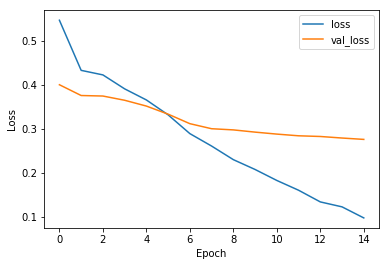

In [71]:
pl.plot(history_rand.history['loss'], label='loss')
pl.plot(history_rand.history['val_loss'], label='val_loss')
pl.legend()
pl.xlabel('Epoch')
pl.ylabel('Loss')

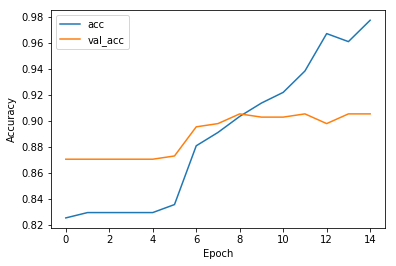

In [72]:
pl.plot(history_rand.history['acc'], label='acc')
pl.plot(history_rand.history['val_acc'], label='val_acc')
pl.legend()
pl.xlabel('Epoch')
pl.ylabel('Accuracy')

In [73]:
model_rand.evaluate(x_test, y_test)

401/401 [==============================] - 0s     


[0.27637477698468804, 0.9052369081765933]

In [75]:
y_ts=[]
for y_pred in y_test:
    if y_pred==0:
        y_ts += ["negative"]
    else:
        y_ts += ["positive"]
       

y_preds_c = model_rand.predict(x_test)
y_preds=[]
for y_pred in y_preds_c:
    if y_pred < .2:
        y_preds += ["negative"]
    else:
        y_preds += ["positive"]
        
label_encoder = LabelEncoder()
y_ts = label_encoder.fit_transform(y_ts)
y_preds = label_encoder.fit_transform(y_preds)

report(label_encoder, y_ts, y_preds)

Classifation Report
[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0

/home/aplm/anaconda2/envs/DeepLearningPython3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:391: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)


In [48]:
y_ts=[]
for y_pred in y_test:
    if y_pred==0:
        y_ts += ["negative"]
    else:
        y_ts += ["positive"]
       

y_preds_c = model_rand.predict(x_test)
y_preds=[]
for y_pred in y_preds_c:
    if y_pred < .2:
        y_preds += ["negative"]
    else:
        y_preds += ["positive"]
        
label_encoder = LabelEncoder()
y_ts = label_encoder.fit_transform(y_ts)
y_preds = label_encoder.fit_transform(y_preds)

report(label_encoder, y_ts, y_preds)

Classifation Report
[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0]
[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0
 1 0 0 1 0 0 1 0

/home/aplm/anaconda2/envs/DeepLearningPython3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:391: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)


In [414]:
y_ts=[]
for y_pred in y_test:
    if y_pred==0:
        y_ts += ["negative"]
    else:
        y_ts += ["positive"]
       

y_preds_c = model_rand.predict(x_test)
y_preds=[]
for y_pred in y_preds_c:
    if y_pred < .5:
        y_preds += ["negative"]
    else:
        y_preds += ["positive"]
        
label_encoder = LabelEncoder()
y_ts = label_encoder.fit_transform(y_ts)
y_preds = label_encoder.fit_transform(y_preds)

report(label_encoder, y_ts, y_preds)

Classifation Report
[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 1 1 0 0 0

/home/aplm/anaconda2/envs/DeepLearningPython3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:391: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
